### Assignment 6 - Knock Airport Weather

Tasks: With data from hly4935.csv file create plot of:
- The temperature
- The mean temperature each day
- The mean temperature for each month
- The wind speed
- The rolling wind speed over 24 hours
- The max wind speed for each day
- The monthly mean of the daily maximal wind speed

There could be a need to correct missing values.

#### Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading dataset

In [3]:
FILENAME= "hly4935.csv"
DATADIR = "../pfda_assignments/"
fields=['date','temp','wdsp'] # Only columns that I need
df = pd.read_csv(DATADIR + FILENAME, usecols=fields, skiprows=23, low_memory=False)
df.head(3)

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0


I am taking columns 'date', 'temp' (temperature in °C), 'wdsp' (wind speed in knots), because this dataset is quite hefty, and I need only these columns.

#### Information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   temp    247674 non-null  float64
 2   wdsp    247674 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.7+ MB


#### Checking missing values

In [5]:
df.isnull().value_counts()

date   temp   wdsp 
False  False  False    247674
Name: count, dtype: int64

This method  is shows no missing values. Probably cells with empty string ' ' are not considered as empty.

In [6]:
date_empty = df[df['date'] == ' ']
print(date_empty)

Empty DataFrame
Columns: [date, temp, wdsp]
Index: []


No missing values in the 'date' column.

In [7]:
temp_empty = df[df['temp'] == ' ']
print(temp_empty)

Empty DataFrame
Columns: [date, temp, wdsp]
Index: []


No missing values in the 'temp' column.

In [8]:
wdsp_empty = df[df['wdsp'] == ' ']
print(wdsp_empty)

                     date  temp wdsp
39      01-aug-1996 22:00  10.8     
1398    27-sep-1996 13:00  11.6     
1795    14-oct-1996 02:00  11.8     
1796    14-oct-1996 03:00  11.6     
1797    14-oct-1996 04:00  11.1     
1798    14-oct-1996 05:00  11.1     
1799    14-oct-1996 06:00  11.0     
1800    14-oct-1996 07:00  10.6     
1801    14-oct-1996 08:00  10.5     
1802    14-oct-1996 09:00  10.7     
1818    15-oct-1996 01:00   5.2     
1819    15-oct-1996 02:00   5.1     
1820    15-oct-1996 03:00   6.3     
1821    15-oct-1996 04:00   5.9     
1822    15-oct-1996 05:00   5.9     
1823    15-oct-1996 06:00   5.9     
1824    15-oct-1996 07:00   5.8     
1825    15-oct-1996 08:00   5.8     
1834    15-oct-1996 17:00   4.6     
1835    15-oct-1996 18:00   5.0     
1836    15-oct-1996 19:00   4.6     
1837    15-oct-1996 20:00   4.1     
1838    15-oct-1996 21:00   4.0     
1839    15-oct-1996 22:00   4.8     
1840    15-oct-1996 23:00   5.3     
1841    16-oct-1996 00:00   5.9     
1

In [9]:
wdsp_empty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 39 to 108042
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    50 non-null     object 
 1   temp    50 non-null     float64
 2   wdsp    50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


50 missing values in column 'wdsp'.

### Refilling empty cells

I am going to refill empty cells with values from previous cells.

In [10]:
df['wdsp'] = df['wdsp'].replace(' ', np.nan) # First I have to change empty string into nan 
df['wdsp'] = df['wdsp'].fillna(method='ffill')# Than, I can refill cell with value from previous cell

In [11]:
wdsp_check = df[df['wdsp'] == ' '] # checking if all cells are filled
print(wdsp_check)

Empty DataFrame
Columns: [date, temp, wdsp]
Index: []


### Converting values in 'wdsp' column into int64

This steps can help me to handle data with mathematical methods.

In [12]:
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='raise') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   temp    247674 non-null  float64
 2   wdsp    247674 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ MB


Now, column 'wdsp' contains values in integer datatype

#### Converting 'date' column into datetime series

In [13]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, format='%d-%b-%Y %H:%M')
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 247674 entries, 0 to 247673
Series name: date
Non-Null Count   Dtype         
--------------   -----         
247674 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.9 MB


### Setting 'date' column as index of dataframe

In [14]:
df.set_index('date', inplace=True)
df.head(3)


,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0
1996-07-31 08:00:00,11.5,0
1996-07-31 09:00:00,11.6,0


Timestamps are in the format YYYY-MM-DD HH:MM:SS or ISO8601 format.

https://en.wikipedia.org/wiki/ISO_8601

In [15]:
df.index[0]

Timestamp('1996-04-10 14:00:00')

In [16]:
df.index[247673]

Timestamp('2024-11-01 00:00:00')

Dataframe df contains meteorological data from  the observed period  10/04/1996 - 01/11/2024.

### Plotting

#### Temperature over the observed period

[Text(0.5, 1.0, 'The temperature in °C over the observed period 10/04/1996 - 01/11/2024')]

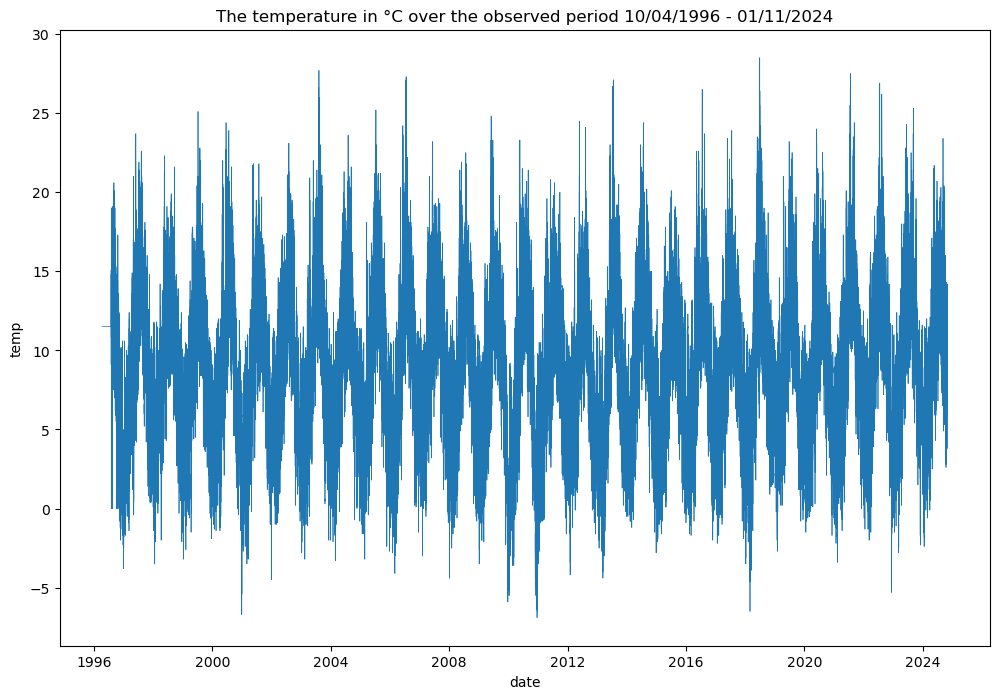

In [17]:
plt.figure(figsize=(12, 8), )
sns.lineplot(data=df, x=df.index, y=df['temp'], linewidth=0.5, ).set(title='The temperature in °C over the observed period 10/04/1996 - 01/11/2024')

In [18]:
df_day_mean=df.resample("1d").mean()

[Text(0.5, 1.0, 'The mean day temperature in °C over the observed period 10/04/1996 - 01/11/2024')]

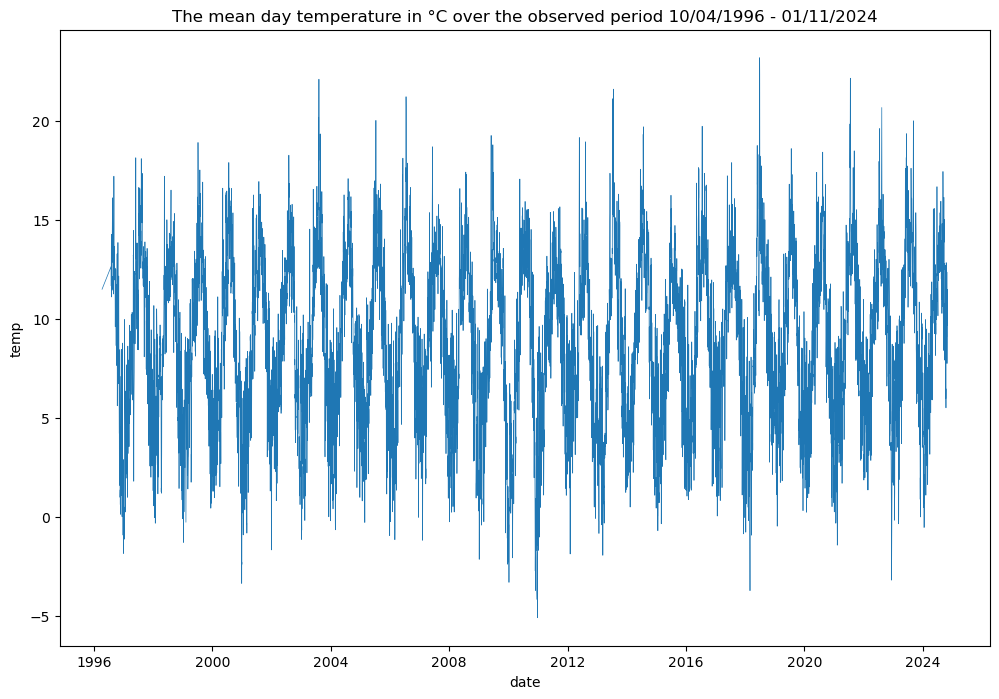

In [19]:
plt.figure(figsize=(12, 8), )
sns.lineplot(x=df_day_mean.index, y=df_day_mean['temp'], linewidth=0.5, ).set(title='The mean day temperature in °C over the observed period 10/04/1996 - 01/11/2024')

In [20]:
df_month_mean=df.resample("1m").mean()

[Text(0.5, 1.0, 'The mean month temperature in °C over the observed period 10/04/1996 - 01/11/2024')]

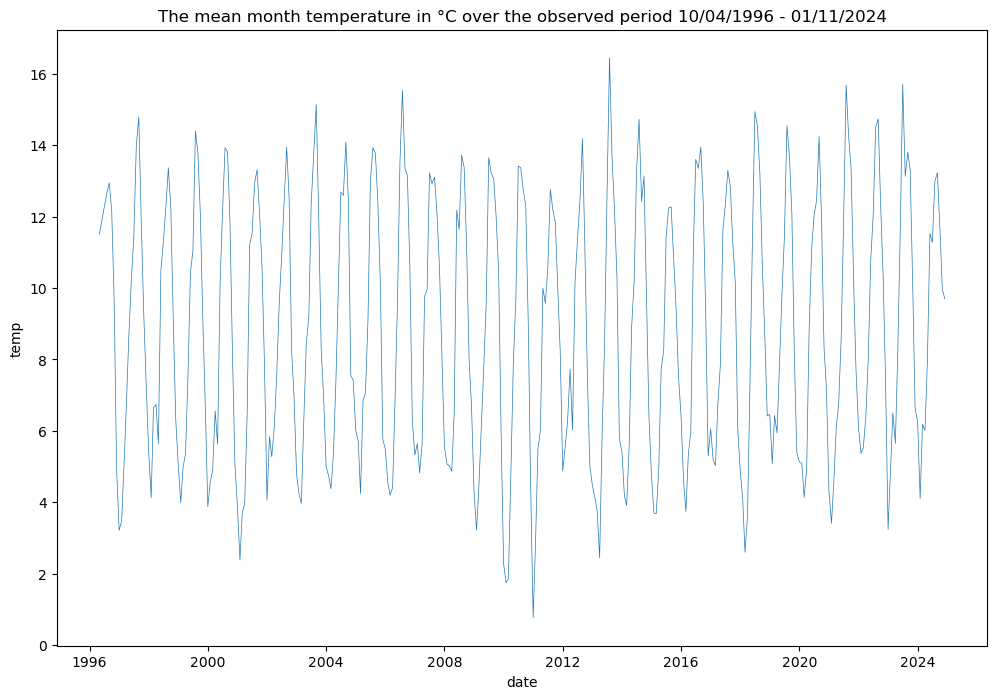

In [21]:
plt.figure(figsize=(12, 8), )
sns.lineplot(x=df_month_mean.index, y=df_month_mean['temp'], linewidth=0.5, ).set(title='The mean month temperature in °C over the observed period 10/04/1996 - 01/11/2024')

[Text(0.5, 1.0, 'The wind speed in knots over the observed period 10/04/1996 - 01/11/2024')]

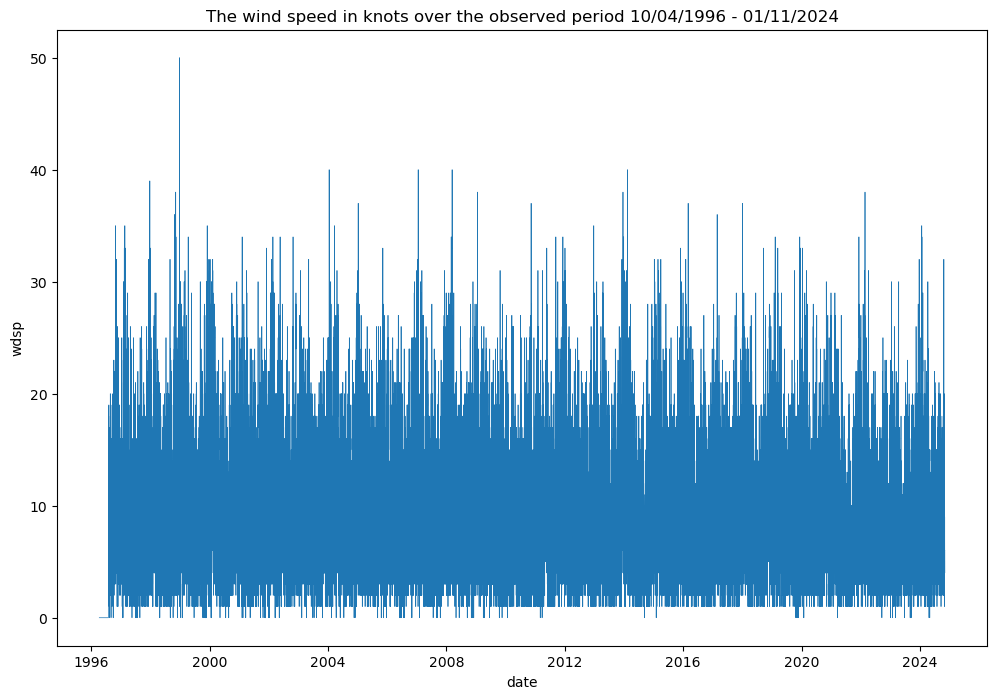

In [22]:
plt.figure(figsize=(12, 8), )
sns.lineplot(data=df, x=df.index, y=df['wdsp'], linewidth=0.5, ).set(title='The wind speed in knots over the observed period 10/04/1996 - 01/11/2024')

In [24]:
df_day_max=df.resample('1d').max()

[Text(0.5, 1.0, 'The maximal daily wind speed in knots over the observed period 10/04/1996 - 01/11/2024')]

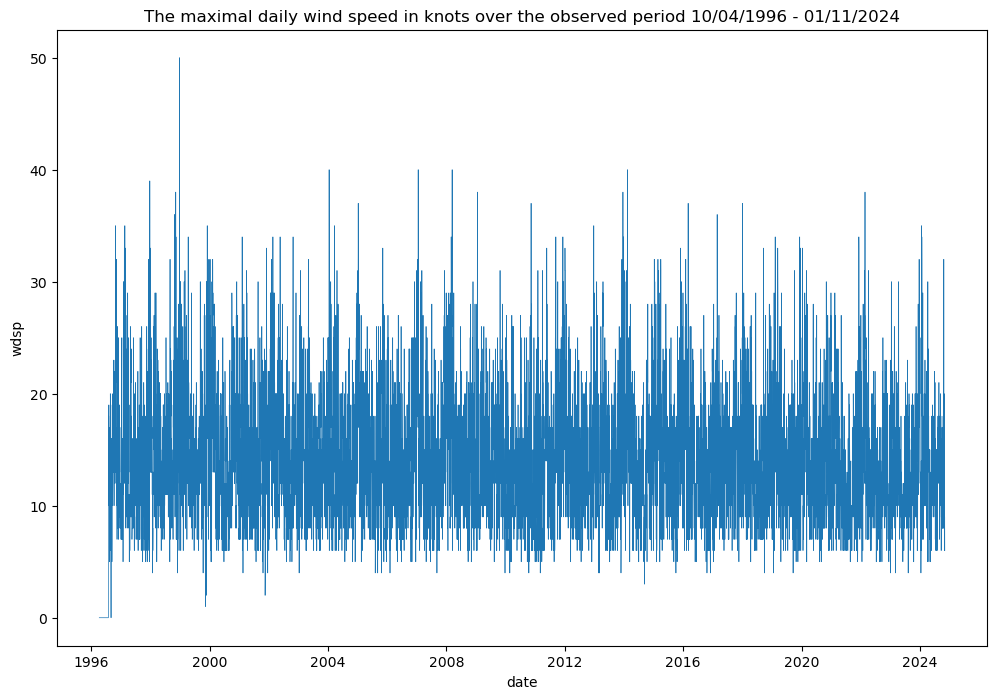

In [25]:
plt.figure(figsize=(12, 8), )
sns.lineplot(data=df_day_max, x=df_day_max.index, y=df_day_max['wdsp'], linewidth=0.5, ).set(title='The maximal daily wind speed in knots over the observed period 10/04/1996 - 01/11/2024')

In [26]:
df_average_day_max_month=df_day_max.resample('1m').mean()

[Text(0.5, 1.0, 'The monthly mean of the daily maximal wind speed in knots over the observed period 10/04/1996 - 01/11/2024')]

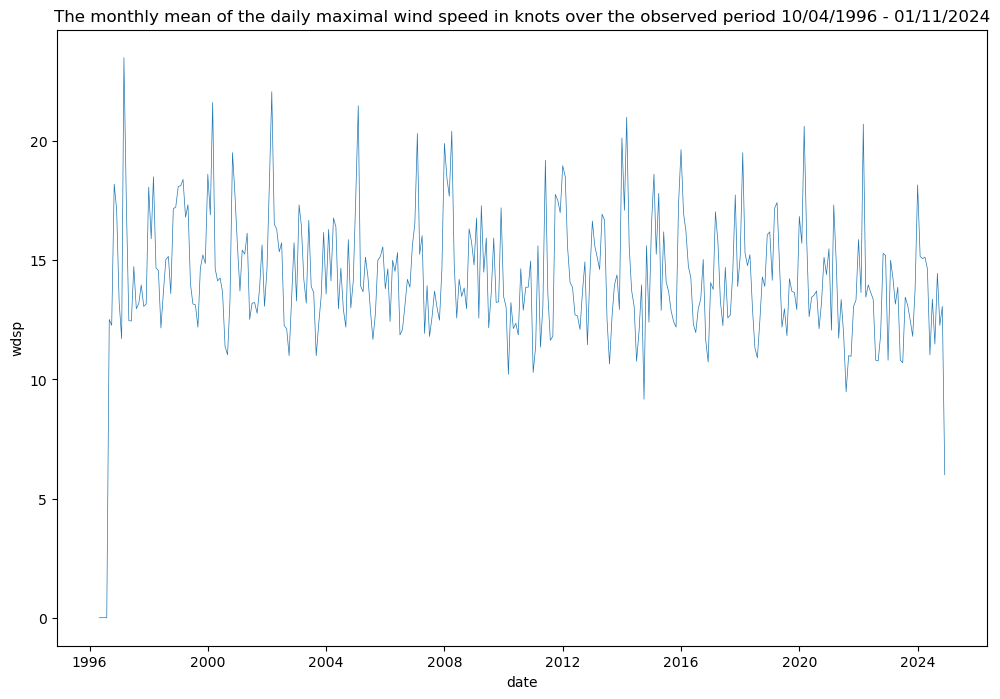

In [28]:
plt.figure(figsize=(12, 8), )
sns.lineplot(data=df_average_day_max_month, x=df_average_day_max_month.index, y=df_average_day_max_month['wdsp'], linewidth=0.5, ).set(title='The monthly mean of the daily maximal wind speed in knots over the observed period 10/04/1996 - 01/11/2024')

In [30]:
df['rolling_windspeed'] = df['wdsp'].rolling(window=24).mean()

[Text(0.5, 1.0, 'The rolling wind speed over 24 hours in knots over the observed period 10/04/1996 - 01/11/2024')]

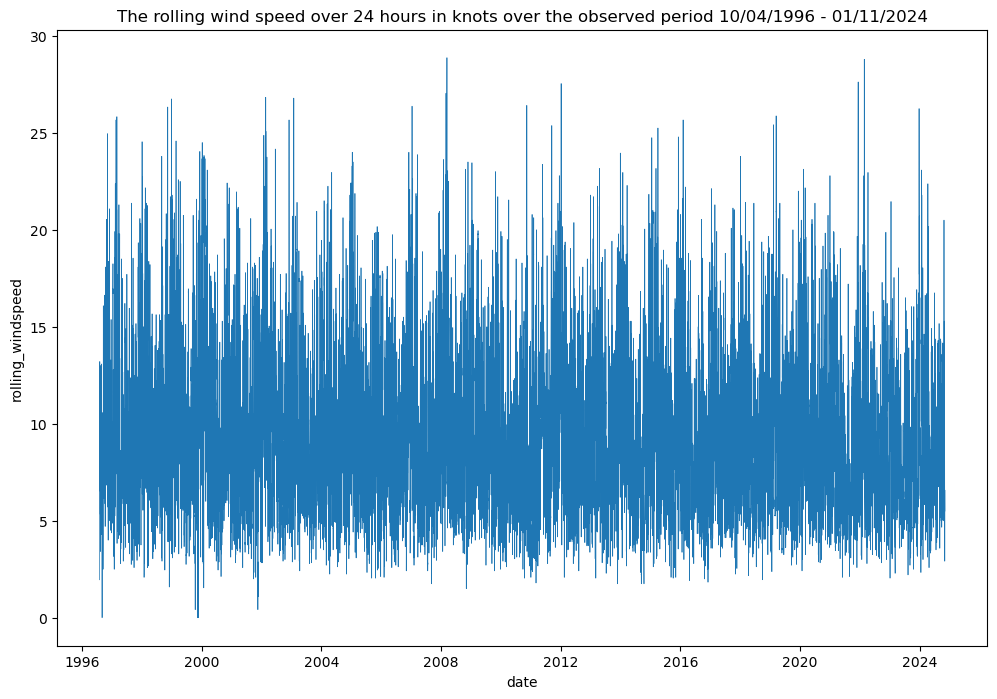

In [31]:
plt.figure(figsize=(12, 8), )
sns.lineplot(data=df, x=df.index, y=df['rolling_windspeed'], linewidth=0.5, ).set(title='The rolling wind speed over 24 hours in knots over the observed period 10/04/1996 - 01/11/2024')

The difference between rolling wind speed over 24 hours and average daily wind speed is in the timing of intervals. The average daily speed is counted from the midnight of a certain day to the midnight of the next day, while rolling speed over 24 hours is counted from an interval that starts at a certain time and finishes after a period of 24 hours. In this case, rolling speed is counted from 14:00 of one day to 14:00 of the next day as our first timestamp is '1996-04-10 14:00:00'.

https://en.wikipedia.org/wiki/Moving_average

***
### End